Notebook untuk eksplor data yang akan digunakan dan untuk mengetahui proporsi yang pas dalam pembagian data (supervised).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv('../data/speed_7578_labeled.csv')

In [ ]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

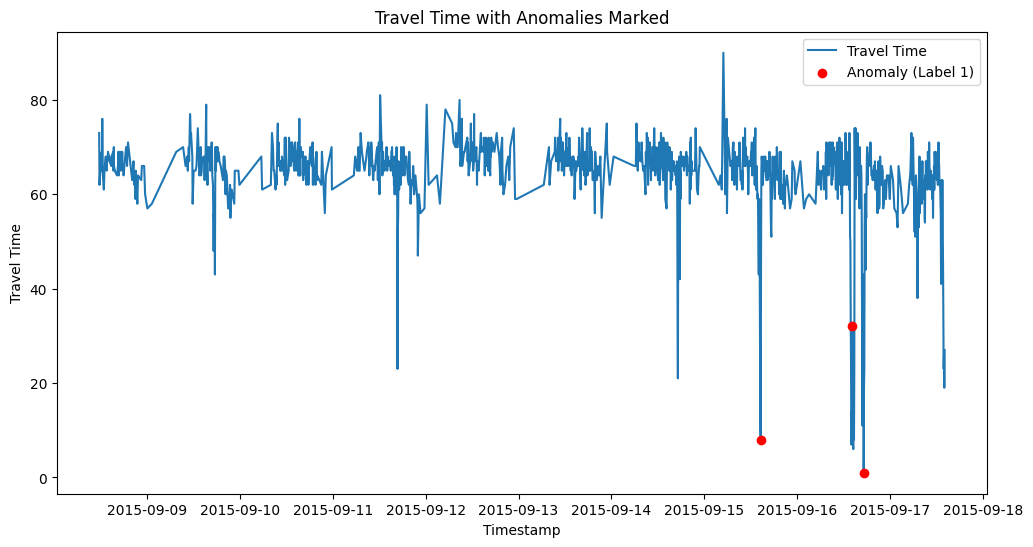

In [ ]:
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Travel Time')

# Mark anomalies where label == 1
anomalies = df[df['label'] == 1]
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomaly (Label 1)', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('Travel Time')
plt.title('Travel Time with Anomalies Marked')
plt.legend()
plt.show()

In [ ]:
# Split data into train, test
total_len = len(df)
train_end = int(0.6 * total_len)

train_data = df[:train_end]
test_data = df[train_end:]


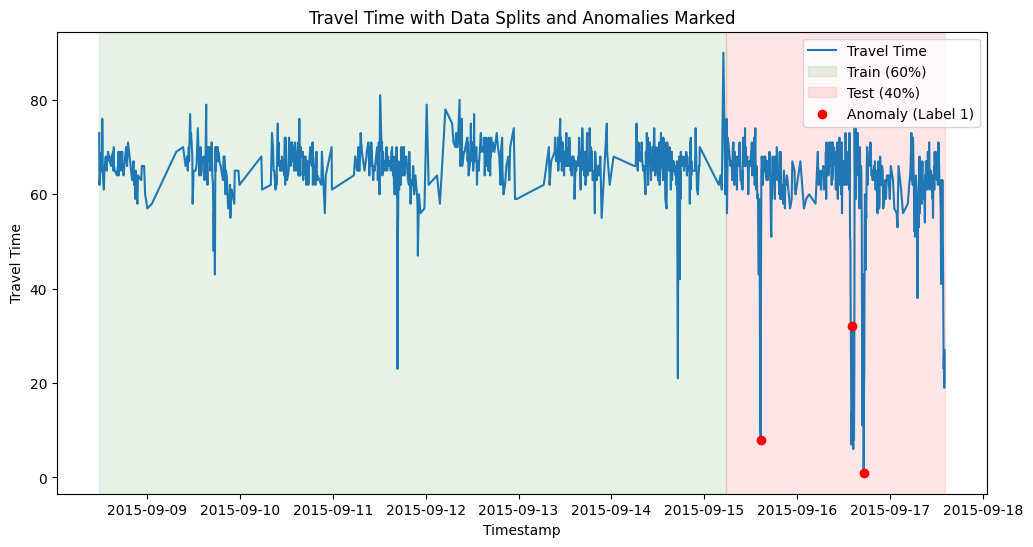

In [ ]:
# Plot with colored areas
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Travel Time')

# Add colored areas
plt.axvspan(df['timestamp'].iloc[0], df['timestamp'].iloc[train_end-1], color='green', alpha=0.1, label='Train (60%)')
plt.axvspan(df['timestamp'].iloc[train_end], df['timestamp'].iloc[-1], color='red', alpha=0.1, label='Test (40%)')

# Mark anomalies
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomaly (Label 1)', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('Travel Time')
plt.title('Travel Time with Data Splits and Anomalies Marked')
plt.legend()
plt.show()